In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df = pd.read_csv('path_to_save_combined_data.csv')
df.head()

,Unnamed: 0,state_name_full,Year,PM2.5,Life Expectancy,Income
0,0,Andhra Pradesh,2004,25.202646,64.6,32057
1,1,Andhra Pradesh,2005,27.262032,65.0,38328
2,2,Andhra Pradesh,2006,27.960725,65.3,28223
3,3,Andhra Pradesh,2007,29.120783,65.5,50870
4,4,Andhra Pradesh,2008,30.682722,65.7,57141


# preprocessing

In [45]:
df.isna().sum()

Unnamed: 0         0
state_name_full    0
Year               0
PM2.5              0
Life Expectancy    0
Income             0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'state_name_full' column
df['state_name_full_encoded'] = label_encoder.fit_transform(df['state_name_full'])

# Display the updated DataFrame to show the encoded column
df[['state_name_full', 'state_name_full_encoded']].head(), label_encoder.classes_


(  state_name_full  state_name_full_encoded
 0  Andhra Pradesh                        0
 1  Andhra Pradesh                        0
 2  Andhra Pradesh                        0
 3  Andhra Pradesh                        0
 4  Andhra Pradesh                        0,
 array(['Andhra Pradesh', 'Assam', 'Bihar', 'Gujarat', 'Haryana',
        'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Odisha',
        'Punjab', 'Rajasthan', 'Tamil Nadu', 'West Bengal'], dtype=object))

In [47]:
df.head()

,Unnamed: 0,state_name_full,Year,PM2.5,Life Expectancy,Income,state_name_full_encoded
0,0,Andhra Pradesh,2004,25.202646,64.6,32057,0
1,1,Andhra Pradesh,2005,27.262032,65.0,38328,0
2,2,Andhra Pradesh,2006,27.960725,65.3,28223,0
3,3,Andhra Pradesh,2007,29.120783,65.5,50870,0
4,4,Andhra Pradesh,2008,30.682722,65.7,57141,0


In [48]:
X = df[['Year', 'state_name_full_encoded','PM2.5','Income']]
y = df[['Life Expectancy']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [286]:
model = LinearRegression()

In [287]:
model.fit(X_train,y_train)

LinearRegression()

In [288]:
y_pred = model.predict(X_test)

In [289]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.0788647017132558

In [290]:
mse = mean_squared_error(y_test, y_pred)
mse

7.936533511141258

In [175]:
r2 = r2_score(y_test, y_pred)
r2

0.4757117247703866

In [296]:
model = DecisionTreeRegressor()

In [297]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [309]:
mae = mean_absolute_error(y_test, y_pred)
mae

2.1752759396586243

In [295]:
mse = mean_squared_error(y_test, y_pred)
mse

7.936533511141258

In [300]:
r2 = r2_score(y_test, y_pred)
r2

0.4757117247703866

In [327]:
model = SVR(kernel='sigmoid')

In [328]:
model.fit(X_train,y_train)

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='sigmoid')

In [329]:
y_pred = model.predict(X_test)

In [330]:
mae = mean_absolute_error(y_test, y_pred)
mae

5.206496652919028

In [331]:
mse = mean_squared_error(y_test, y_pred)
mse

47.27157556558904

In [332]:
r2 = r2_score(y_test, y_pred)
r2

-2.122765472592975

In [342]:
model = KNeighborsRegressor(n_neighbors= 5)

In [343]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [344]:
mae = mean_absolute_error(y_test, y_pred)
mae

5.206496652919028

In [345]:
mse = mean_squared_error(y_test, y_pred)
mse

47.27157556558904

In [346]:
r2 = r2_score(y_test, y_pred)
r2

-2.122765472592975

In [50]:
model = RandomForestRegressor(n_estimators=100, max_features='sqrt', random_state=42)

In [51]:
model.fit(X_train,y_train)

c:\Users\anees\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features='sqrt', random_state=42)

In [52]:
y_pred = model.predict(X_test)

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.8681666666666721

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

1.2681006555555614

In [55]:
r2 = r2_score(y_test, y_pred)
r2

0.9162291314482003

In [56]:
df.head()

,Unnamed: 0,state_name_full,Year,PM2.5,Life Expectancy,Income,state_name_full_encoded
0,0,Andhra Pradesh,2004,25.202646,64.6,32057,0
1,1,Andhra Pradesh,2005,27.262032,65.0,38328,0
2,2,Andhra Pradesh,2006,27.960725,65.3,28223,0
3,3,Andhra Pradesh,2007,29.120783,65.5,50870,0
4,4,Andhra Pradesh,2008,30.682722,65.7,57141,0


In [57]:
maharashtra_data = df[df['state_name_full_encoded'] == 8]

In [58]:
maharashtra_data

,Unnamed: 0,state_name_full,Year,PM2.5,Life Expectancy,Income,state_name_full_encoded
128,128,Maharashtra,2004,32.657121,67.5,47581,8
129,129,Maharashtra,2005,32.861993,68.0,55731,8
130,130,Maharashtra,2006,34.937978,68.6,41965,8
131,131,Maharashtra,2007,35.969626,69.1,72030,8
132,132,Maharashtra,2008,37.623506,69.5,80180,8
133,133,Maharashtra,2009,36.835771,69.6,88330,8
134,134,Maharashtra,2010,36.452588,69.9,96480,8
135,135,Maharashtra,2011,38.317619,70.3,84858,8
136,136,Maharashtra,2012,36.745350,70.8,99564,8
137,137,Maharashtra,2013,38.463058,71.3,111980,8


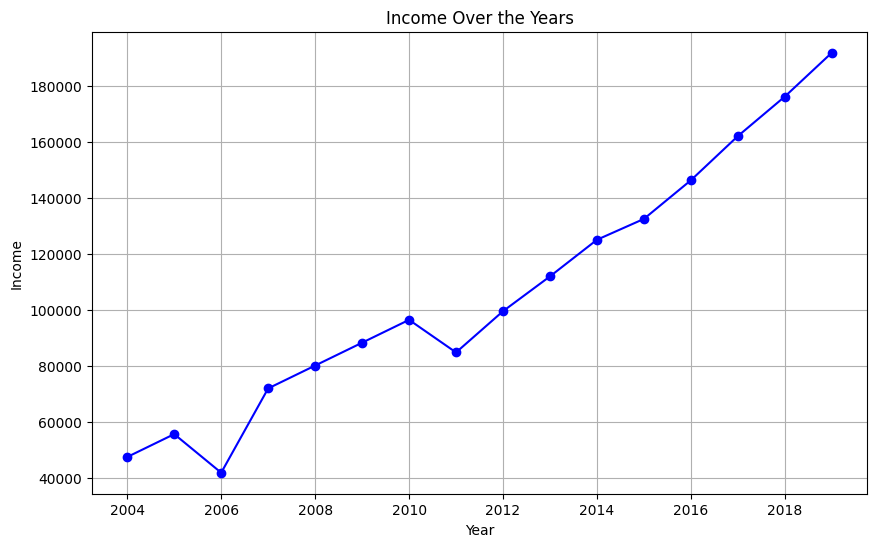

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(maharashtra_data['Year'], maharashtra_data['Income'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income Over the Years')
plt.grid(True)
plt.show()

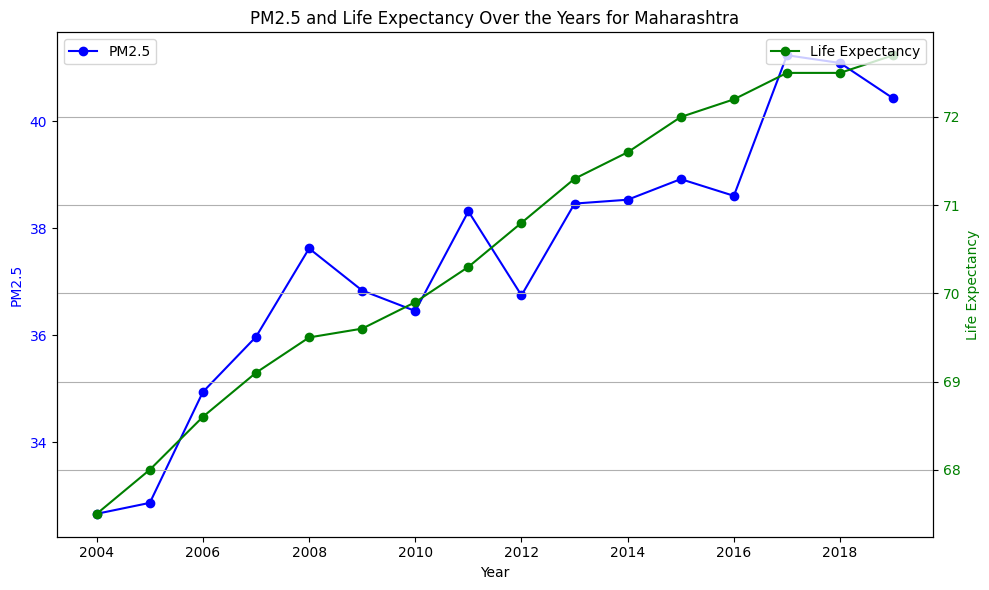

In [34]:
# Create the figure and primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Income on the primary y-axis
ax1.plot(maharashtra_data['Year'], maharashtra_data['PM2.5'], color='b', marker='o', linestyle='-', label='PM2.5')
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(maharashtra_data['Year'], maharashtra_data['Life Expectancy'], color='g', marker='o', linestyle='-', label='Life Expectancy')
ax2.set_ylabel('Life Expectancy', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add titles and legends
plt.title('PM2.5 and Life Expectancy Over the Years for Maharashtra')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
unique_years = df['Year'].unique()
unique_states = df['state_name_full_encoded'].unique()

# Create a new DataFrame for prediction years and states
new_data = pd.DataFrame([(year, state, 25, income) for year in range(2000, 2021) for state, income in zip(df['state_name_full_encoded'], df['Income'])], columns=['Year', 'state_name_full_encoded', 'PM2.5', 'Income'])

In [36]:
new_data

,Year,state_name_full_encoded,PM2.5,Income
0,2000,0,25,32057
1,2000,0,25,38328
2,2000,0,25,28223
3,2000,0,25,50870
4,2000,0,25,57141
...,...,...,...,...
4699,2020,13,25,68876
4700,2020,13,25,75592
4701,2020,13,25,82291
4702,2020,13,25,93711


In [22]:
new_data['PM2.5'].describe()

count    4704.0
mean       25.0
std         0.0
min        25.0
25%        25.0
50%        25.0
75%        25.0
max        25.0
Name: PM2.5, dtype: float64

In [37]:
predicted_life_expectancy = model.predict(new_data)

# Add the predictions back to the new_data DataFrame
new_data['Predicted Life Expectancy'] = predicted_life_expectancy

# Display the first few rows of the prediction DataFrame
print(new_data.head())

   Year  state_name_full_encoded  PM2.5  Income  Predicted Life Expectancy
0  2000                        0     25   32057                     64.883
1  2000                        0     25   38328                     65.136
2  2000                        0     25   28223                     64.586
3  2000                        0     25   50870                     65.701
4  2000                        0     25   57141                     65.877


In [38]:
# Merge original and predicted dataframes on 'Year' and 'state_name_full_encoded'
comparison_df = pd.merge(
    df[['Year', 'state_name_full_encoded', 'Life Expectancy']],  # make sure to select the correct column from the original data
    new_data[['Year', 'state_name_full_encoded', 'Predicted Life Expectancy']],
    on=['Year', 'state_name_full_encoded'],
    suffixes=('_old', '_pred')  # Adjust suffixes if needed
)


In [39]:
comparison_df.columns

Index(['Year', 'state_name_full_encoded', 'Life Expectancy',
       'Predicted Life Expectancy'],
      dtype='object')

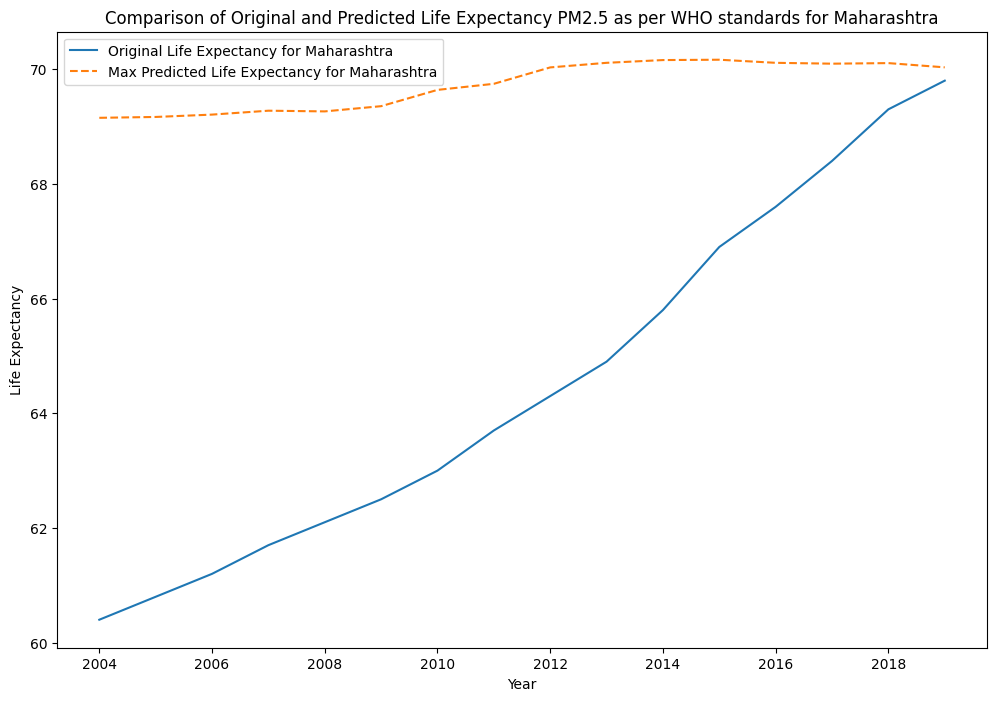

In [40]:
maharashtra_code = 9

maharashtra_data = comparison_df[comparison_df['state_name_full_encoded'] == maharashtra_code]
maharashtra_data = maharashtra_data.sort_values(by='Year')
maharashtra_max_data = maharashtra_data.groupby('Year').agg({'Life Expectancy': 'first', 
                                                             'Predicted Life Expectancy': 'max'}).reset_index()

# Plot the original life expectancy and the max predicted life expectancy
plt.figure(figsize=(12, 8))
plt.plot(maharashtra_max_data['Year'], maharashtra_max_data['Life Expectancy'], label='Original Life Expectancy for Maharashtra')
plt.plot(maharashtra_max_data['Year'], maharashtra_max_data['Predicted Life Expectancy'], label='Max Predicted Life Expectancy for Maharashtra', linestyle='--')
plt.title('Comparison of Original and Predicted Life Expectancy PM2.5 as per WHO standards for Maharashtra')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

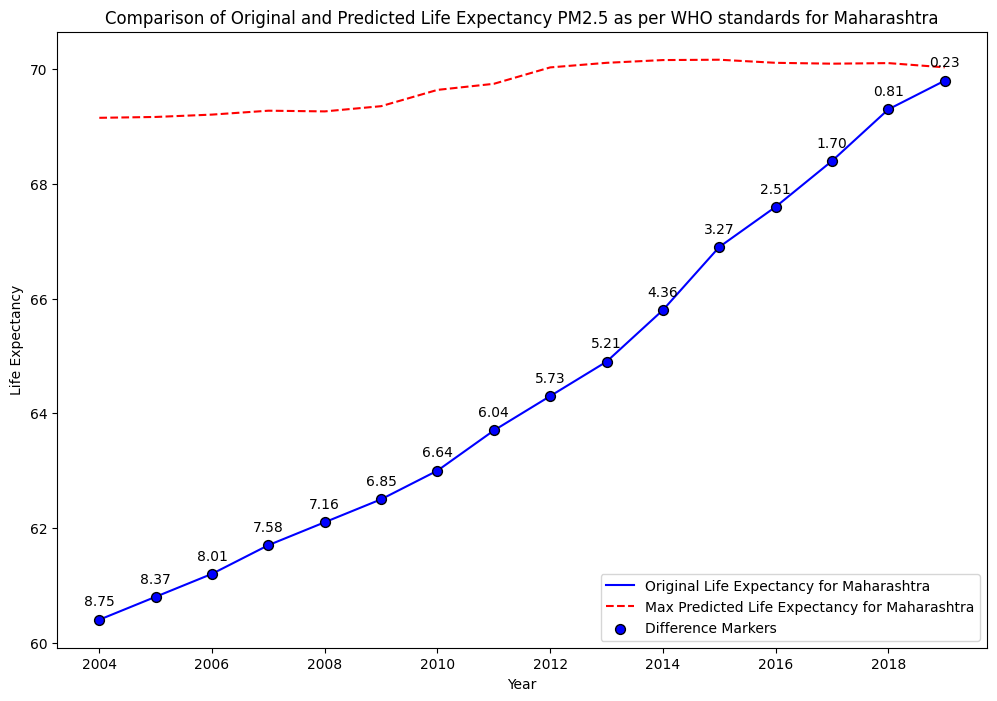

In [41]:
maharashtra_max_data['Difference'] = maharashtra_max_data['Predicted Life Expectancy'] - maharashtra_max_data['Life Expectancy']

plt.figure(figsize=(12, 8))
plt.plot(maharashtra_max_data['Year'], maharashtra_max_data['Life Expectancy'], label='Original Life Expectancy for Maharashtra', color='blue')
plt.plot(maharashtra_max_data['Year'], maharashtra_max_data['Predicted Life Expectancy'], label='Max Predicted Life Expectancy for Maharashtra', color='red', linestyle='--')

# Add markers for differences
plt.scatter(maharashtra_max_data['Year'], maharashtra_max_data['Life Expectancy'], color='blue', s=50, edgecolors='black', label='Difference Markers', zorder=5)
for i, txt in enumerate(maharashtra_max_data['Difference']):
    plt.annotate(f'{txt:.2f}', (maharashtra_max_data['Year'].iloc[i], maharashtra_max_data['Life Expectancy'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Comparison of Original and Predicted Life Expectancy PM2.5 as per WHO standards for Maharashtra')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

In [229]:
print("Original DataFrame columns:", df.columns)
print("New DataFrame columns:", new_data.columns)


Original DataFrame columns: Index(['Unnamed: 0', 'state_name_full', 'Year', 'PM2.5', 'Life Expectancy',
       'Income', 'state_name_full_encoded'],
      dtype='object')
New DataFrame columns: Index(['Year', 'state_name_full_encoded', 'PM2.5', 'Income',
       'Predicted Life Expectancy'],
      dtype='object')


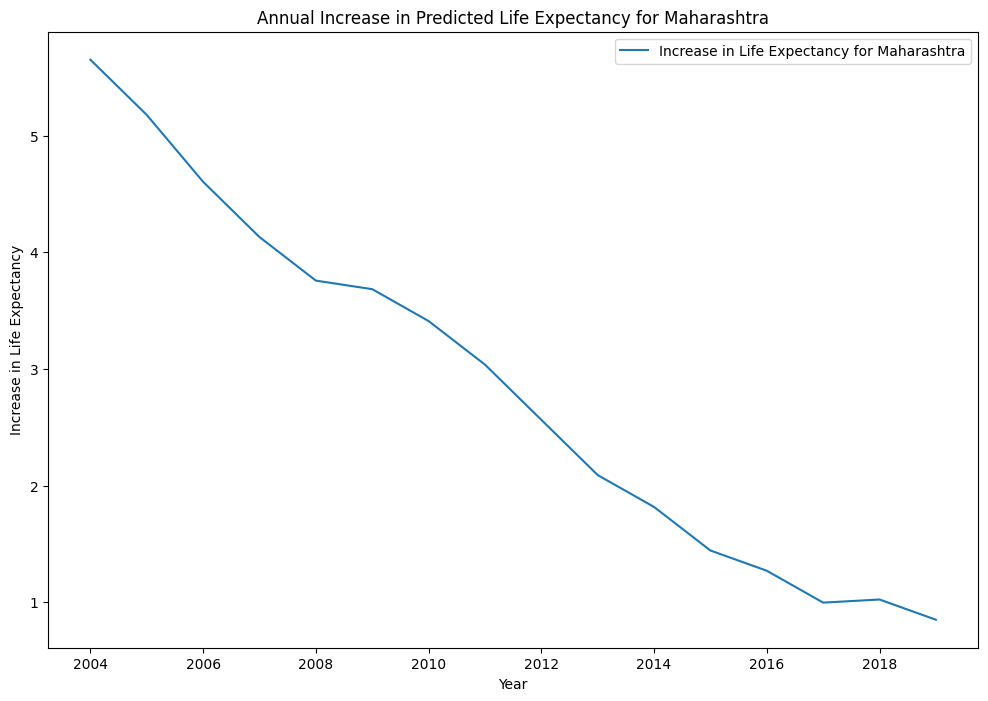

In [230]:
# Calculate the difference between max predicted and actual life expectancy
maharashtra_max_data['Life Expectancy Increase'] = maharashtra_max_data['Predicted Life Expectancy'] - maharashtra_max_data['Life Expectancy']

# Plot the increase in life expectancy
plt.figure(figsize=(12, 8))
plt.plot(maharashtra_max_data['Year'], maharashtra_max_data['Life Expectancy Increase'], label='Increase in Life Expectancy for Maharashtra')
plt.title('Annual Increase in Predicted Life Expectancy for Maharashtra')
plt.xlabel('Year')
plt.ylabel('Increase in Life Expectancy')
plt.legend()
plt.show()



KeyError: 'Life Expectancy Increase'

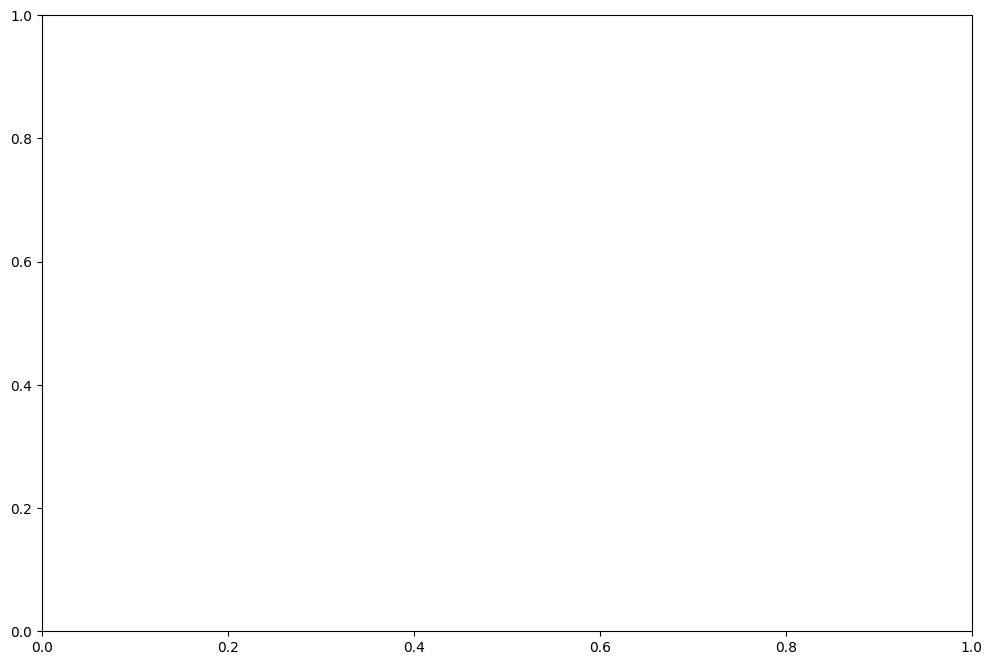

In [42]:
# Assuming 'Income' is already a column in the 'maharashtra_max_data' DataFrame
# and it contains the income data for Maharashtra.

# Create the initial plot with increase in life expectancy
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(maharashtra_max_data['Year'], maharashtra_max_data['Life Expectancy Increase'], label='Increase in Life Expectancy for Maharashtra', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Increase in Life Expectancy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a secondary y-axis for income
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
maharashtra_code = 8

maharashtra_data = df[df['state_name_full_encoded'] == maharashtra_code]
ax2.plot(maharashtra_data['Year'], maharashtra_data['Income'], label='Income for Maharashtra', color='green', linestyle='--')
ax2.set_ylabel('Income', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')

plt.title('Annual Increase in Predicted Life Expectancy and Income')
plt.show()


In [210]:
df1 = df

In [211]:
df1.head()

,Unnamed: 0,state_name_full,Year,PM2.5,Life Expectancy,Income
0,0,Andhra Pradesh,2004,25.202646,64.6,42667.867
1,1,Andhra Pradesh,2005,27.262032,65.0,51014.568
2,2,Andhra Pradesh,2006,27.960725,65.3,37564.813
3,3,Andhra Pradesh,2007,29.120783,65.5,67707.970
4,4,Andhra Pradesh,2008,30.682722,65.7,76054.671


In [377]:
# Assuming 'state_name_full_encoded' for Maharashtra is known
# Let's say the code for Maharashtra is 'maharashtra_code'
maharashtra_code = 9  # Replace with the actual code for Maharashtra

# Filter the original dataframe for Maharashtra
maharashtra_data = df[df['state_name_full_encoded'] == maharashtra_code].copy()
maharashtra_data1 = maharashtra_data.copy()

In [383]:
# Increase the 'Income' column by 10%
maharashtra_data['Income'] *= 1.1


In [384]:
maharashtra_data.columns

Index(['Unnamed: 0', 'state_name_full', 'Year', 'PM2.5', 'Life Expectancy',
       'Income', 'state_name_full_encoded',
       'Predicted Life Expectancy with 10% Income Increase'],
      dtype='object')

In [385]:
# Predict life expectancy with the increased income
# It's important that the feature order matches what the model expects
X_maharashtra = maharashtra_data[['Year', 'state_name_full_encoded', 'PM2.5', 'Income']]
predictions_maharashtra = model.predict(X_maharashtra)


In [386]:
# Add the predictions to the dataframe
maharashtra_data['Predicted Life Expectancy with 10% Income Increase'] = predictions_maharashtra


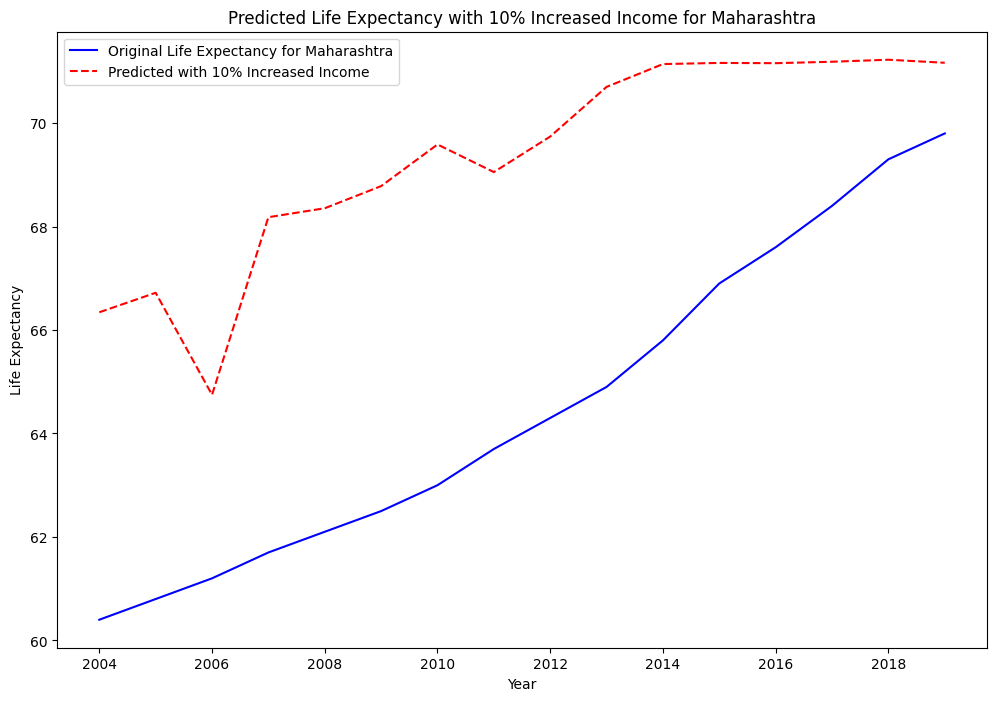

In [387]:
plt.figure(figsize=(12, 8))
plt.plot(maharashtra_data1['Year'], maharashtra_data1['Life Expectancy'], label='Original Life Expectancy for Maharashtra', color='blue')
plt.plot(maharashtra_data['Year'], maharashtra_data['Predicted Life Expectancy with 10% Income Increase'], label='Predicted with 10% Increased Income', color='red', linestyle='--')
plt.title('Predicted Life Expectancy with 10% Increased Income for Maharashtra')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


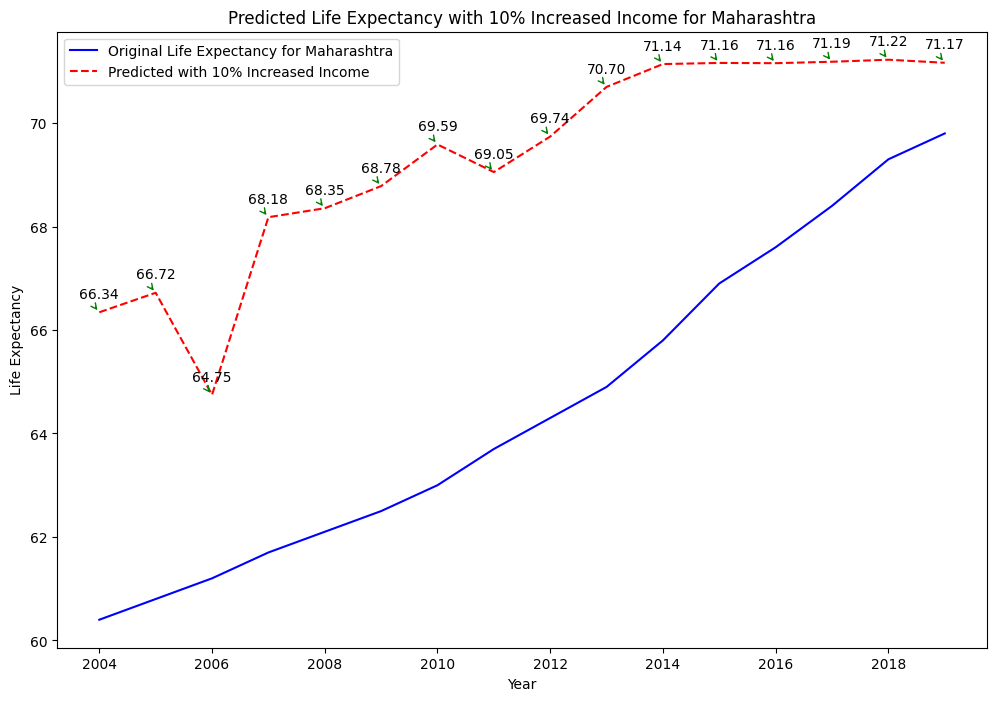

In [391]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(maharashtra_data['Year'], maharashtra_data['Life Expectancy'], label='Original Life Expectancy for Maharashtra', color='blue')
plt.plot(maharashtra_data['Year'], maharashtra_data['Predicted Life Expectancy with 10% Income Increase'], label='Predicted with 10% Increased Income', color='red', linestyle='--')

# Annotating points
for i in range(len(maharashtra_data['Year'])):
    plt.annotate(
        f"{maharashtra_data['Predicted Life Expectancy with 10% Income Increase'].iloc[i]:.2f}", 
        (maharashtra_data['Year'].iloc[i], maharashtra_data['Predicted Life Expectancy with 10% Income Increase'].iloc[i]),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5", color='green')
    )

plt.title('Predicted Life Expectancy with 10% Increased Income for Maharashtra')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


In [394]:
# Assuming 'maharashtra_data' contains both the original and predicted life expectancy
# and it's been updated to reflect the 10% increase in income predictions
maharashtra_data['Diff'] = maharashtra_data['Predicted Life Expectancy with 10% Income Increase'] - maharashtra_data['Life Expectancy']
maharashtra_data['Perc Diff'] = (maharashtra_data['Diff'] / maharashtra_data['Life Expectancy']) * 100


In [395]:
# Summary statistics for the differences
diff_summary = maharashtra_data['Diff'].describe()
perc_diff_summary = maharashtra_data['Perc Diff'].describe()

print("Summary Statistics for Absolute Differences:")
print(diff_summary)
print("\nSummary Statistics for Percentage Differences:")
print(perc_diff_summary)


Summary Statistics for Absolute Differences:
count    16.000000
mean      4.802938
std       1.681487
min       1.366000
25%       3.555500
50%       5.396500
75%       6.020750
max       6.587000
Name: Diff, dtype: float64

Summary Statistics for Percentage Differences:
count    16.000000
mean      7.551021
std       2.821785
min       1.957020
25%       5.663868
50%       8.431898
75%       9.892353
max      10.504052
Name: Perc Diff, dtype: float64


In [397]:
# Calculate the difference between predicted and original life expectancy
maharashtra_max_data['Difference'] = maharashtra_max_data['Predicted Life Expectancy'] - maharashtra_max_data['Life Expectancy']


In [398]:
# Summary statistics for the differences
difference_stats = maharashtra_max_data['Difference'].describe()
print("Statistical Summary for Differences in Life Expectancy:")
print(difference_stats)


Statistical Summary for Differences in Life Expectancy:
count    16.000000
mean      5.201062
std       2.754251
min       0.232000
25%       3.076500
50%       5.888000
75%       7.267000
max       8.752000
Name: Difference, dtype: float64


In [399]:
maharashtra_data['Income'] *= 1.10
maharashtra_data['PM2.5'] *= 0.90

In [411]:
# After adjusting the values, keep the original column names for compatibility with the trained model
maharashtra_data['Income'] *= 1.10
maharashtra_data['PM2.5'] *= 0.90

# Make sure the dataframe used for prediction has the exact same feature names as used in training
X_predict = maharashtra_data[['Year', 'state_name_full_encoded','PM2.5','Income']]


In [412]:
# Predicting with the model
predictions = model.predict(X_predict)


In [414]:
# Assuming predictions are stored in 'Predicted Life Expectancy' column
maharashtra_data['Predicted Life Expectancy'] = predictions  # if predictions are not already added


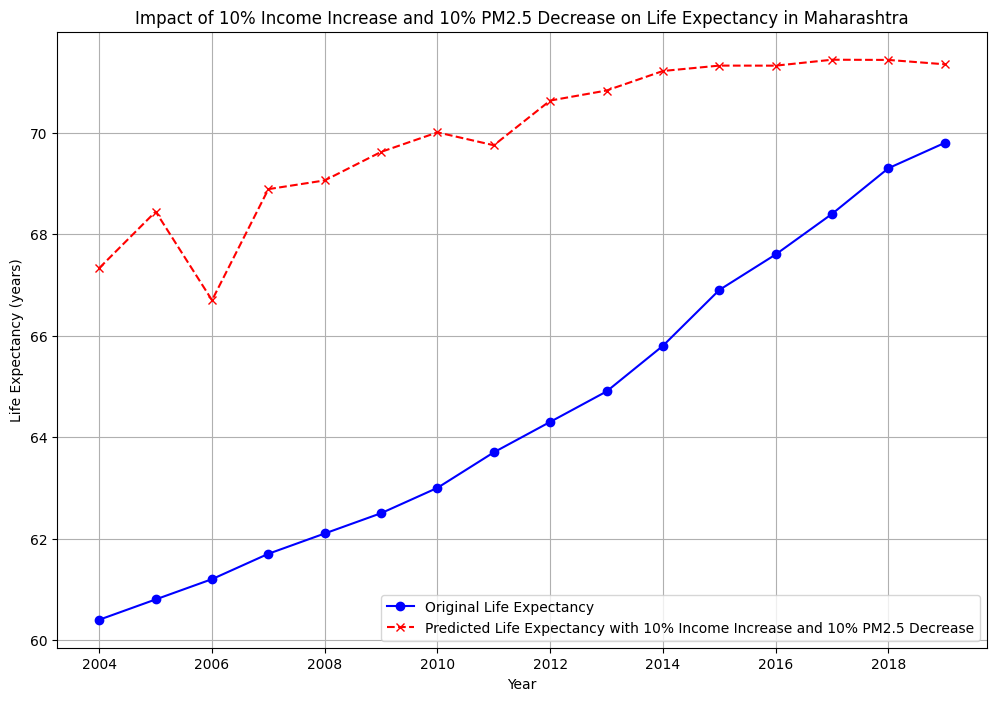

In [415]:
plt.figure(figsize=(12, 8))
plt.plot(maharashtra_data['Year'], maharashtra_data['Life Expectancy'], label='Original Life Expectancy', color='blue', marker='o', linestyle='-')
plt.plot(maharashtra_data['Year'], maharashtra_data['Predicted Life Expectancy'], label='Predicted Life Expectancy with 10% Income Increase and 10% PM2.5 Decrease', color='red', linestyle='--', marker='x')

plt.title('Impact of 10% Income Increase and 10% PM2.5 Decrease on Life Expectancy in Maharashtra')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend()
plt.grid(True)
plt.show()


In [416]:
# Calculate the differences between the original and predicted life expectancies
maharashtra_data['Difference'] = maharashtra_data['Predicted Life Expectancy'] - maharashtra_data['Life Expectancy']


In [417]:
difference_stats = maharashtra_data['Difference'].describe()
print("Statistical Summary for Differences in Life Expectancy:")
print(difference_stats)

Statistical Summary for Differences in Life Expectancy:
count    16.000000
mean      5.434812
std       1.914430
min       1.549000
25%       4.247750
50%       5.992500
75%       6.971750
max       7.645000
Name: Difference, dtype: float64
